# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## Sect2. Linear Regression

In [1]:
from tqdm import tqdm_notebook
from images import bigpycraft_copy as bpc

## Hypothesis
<hr>

$$H(x) = Wx+b$$
$$H(x_1,x_2) = w_1x_1 + w_2x_2 + b$$
$$H(x_1,...,x_n) = w_1x_1 + ... + w_nx_n + b$$


$$[w1 w2 w3] \times\begin{bmatrix}    x_{1}\\    x_{2}\\    x_{3}\end{bmatrix}=[w_1\times x_1 + w_2 \times x_2 + w_3 \times x_3 + b]$$


$$H(X) = WX + b$$


$$[b w1 w2 w3] \times \begin{bmatrix}     1\\     x_{1}\\     x_{2}\\    x_{3} \end{bmatrix} = [b \times 1 + w_1\times x_1 + w_2 \times x_2 + w_3 \times x_3] $$


$$H(X) = WX$$


$$\\
\begin{bmatrix}
    b\\
    w_{1}\\
    w_{2}\\
    w_{3}\\
\end{bmatrix}
\times
\begin{bmatrix}
    1\\
    x_{1}\\
    x_{2}\\
    x_{3}\\
\end{bmatrix}
\neq [b w1 w2 w3] \times
\begin{bmatrix}
    1\\
    x_{1}\\
    x_{2}\\
    x_{3}\\
\end{bmatrix}\\
$$


### Transpose

$$ \begin{bmatrix}    w_{1} && w_{4}\\    w_{2} && w_{5}\\    w_{3} && w_{6}\\ \end{bmatrix}^T = \begin{bmatrix}     w_{1} && w_{2} && w_{3}\\     w_{4} && w_{5} && w_{6}\\  \end{bmatrix}\\
$$

어떨 때 우리는 아래와 같이 사용하기도 한다.

$$H(X) = W^T X$$

<hr>

## Hypothesis and cost function

$$H(x) = Wx+b$$

<br/>

$$cost(W,b) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

### TensorFlow Mechanics
> 
1. Build graph using TF operations
2. Run graph and get results
3. Update graph and get results


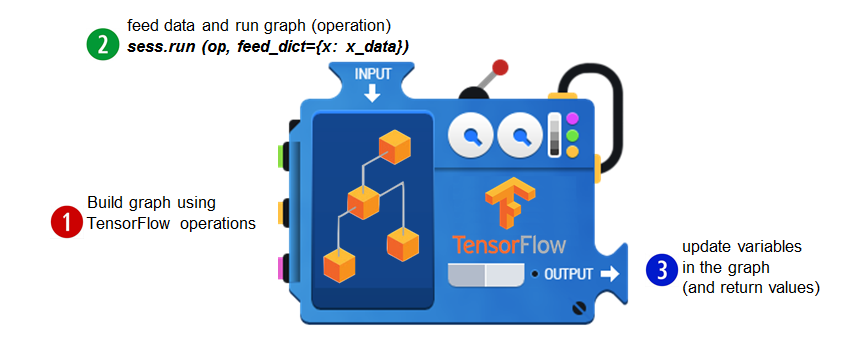

In [2]:
# TensorFlow Mechanics
bpc.Figure(bpc.ML02_IMG_01)

### Ex1. Variable 사용
> $$H(x) = Wx+b$$
x, y 값이 주어졌을 때, W, b 값을 예측하기
<br>
1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

In [3]:
import tensorflow as tf

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# TF 변수 선언 (1차원 랜던숫자)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())


In [4]:
# Fit the line
for step in tqdm_notebook(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val},  \t W={W_val},  \t b={b_val}".format(
            step=step, 
            cost_val=sess.run(cost), 
            W_val=sess.run(W), 
            b_val=sess.run(b)
        ));


A Jupyter Widget

step=0, 	 cost=1.6858243942260742,  	 W=[ 0.36907268],  	 b=[ 0.07003044]
step=1, 	 cost=1.3350452184677124,  	 W=[ 0.42515802],  	 b=[ 0.09386692]
step=2, 	 cost=1.0577608346939087,  	 W=[ 0.47505528],  	 b=[ 0.11498326]
step=3, 	 cost=0.8385705947875977,  	 W=[ 0.51945078],  	 b=[ 0.13368139]
step=4, 	 cost=0.6653006672859192,  	 W=[ 0.55895478],  	 b=[ 0.15022972]
step=200, 	 cost=0.004645753651857376,  	 W=[ 0.92083657],  	 b=[ 0.17995694]
step=400, 	 cost=0.0017739753238856792,  	 W=[ 0.95108187],  	 b=[ 0.11120243]
step=600, 	 cost=0.0006773928180336952,  	 W=[ 0.9697715],  	 b=[ 0.06871653]
step=800, 	 cost=0.00025865971110761166,  	 W=[ 0.98132068],  	 b=[ 0.04246249]
step=1000, 	 cost=9.876807598629966e-05,  	 W=[ 0.98845732],  	 b=[ 0.02623919]
step=1200, 	 cost=3.771482079173438e-05,  	 W=[ 0.99286735],  	 b=[ 0.01621412]
step=1400, 	 cost=1.4401774933503475e-05,  	 W=[ 0.99559247],  	 b=[ 0.01001936]
step=1600, 	 cost=5.499048711499199e-06,  	 W=[ 0.99727637],  	 b=[ 0.0061

### Ex2. Plaeholder 사용
> 
데이터의 형태만 지정하고 실제 데이터는 실행단계에서 입력받는 방법
<br>
1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

<hr>
``` python 
# tf.random_normal

Signature: tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
Docstring:
Outputs random values from a normal distribution.

Returns:
  A tensor of the specified shape filled with random normal values.
```

In [5]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())


In [6]:
# Fit the line
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []

for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3], 
                                                    Y: [1, 2, 3]})
    
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));
        

A Jupyter Widget

step=0, 	 cost=4.256466388702393, 	 W=[-0.0003564], 	 b=[ 0.35437024]
step=1, 	 cost=3.3775856494903564, 	 W=[ 0.07883539], 	 b=[ 0.38729709]
step=2, 	 cost=2.682814836502075, 	 W=[ 0.14931887], 	 b=[ 0.41639775]
step=3, 	 cost=2.133572816848755, 	 W=[ 0.21205986], 	 b=[ 0.44209704]
step=4, 	 cost=1.699364185333252, 	 W=[ 0.26791707], 	 b=[ 0.4647727]
step=200, 	 cost=0.024386905133724213, 	 W=[ 0.81906229], 	 b=[ 0.41131386]
step=400, 	 cost=0.0093120988458395, 	 W=[ 0.88819158], 	 b=[ 0.25416681]
step=600, 	 cost=0.0035558196250349283, 	 W=[ 0.93090916], 	 b=[ 0.15705967]
step=800, 	 cost=0.0013577843783423305, 	 W=[ 0.95730603], 	 b=[ 0.09705328]
step=1000, 	 cost=0.0005184700130484998, 	 W=[ 0.97361773], 	 b=[ 0.05997305]
step=1200, 	 cost=0.000197976638446562, 	 W=[ 0.98369741], 	 b=[ 0.03705966]
step=1400, 	 cost=7.559786172350869e-05, 	 W=[ 0.9899258], 	 b=[ 0.02290077]
step=1600, 	 cost=2.8866988941445015e-05, 	 W=[ 0.99377483], 	 b=[ 0.01415119]
step=1800, 	 cost=1.10226055767

In [7]:
W_val, W_val[0], type(W_val[0])

(array([ 0.99762291], dtype=float32), 0.99762291, numpy.float32)

In [8]:
# cost_vals, b_val
type(b_val), str(b_val), float(b_val)

(numpy.ndarray, '[ 0.00540363]', 0.005403625313192606)

### Ex3. Plaeholder 사용
> 
- X: [1.0, 2.0, 3.0, 4.0, 5.0]
- Y: [2.1, 3.1, 4.1, 5.1, 6.1]
- W=1, b=1.1

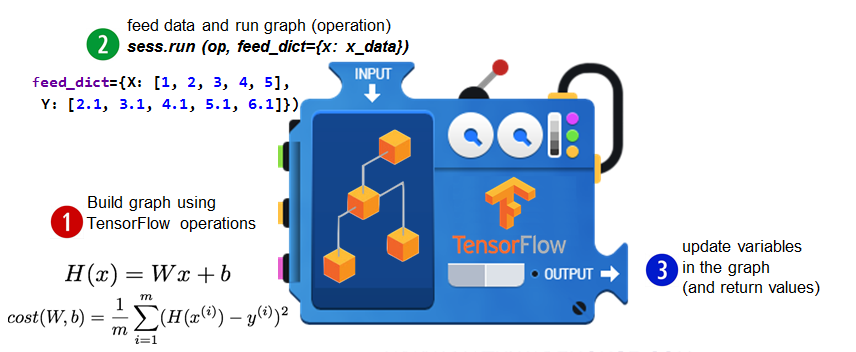

In [9]:
# TensorFlow Mechanism for placeholder
bpc.Figure(bpc.ML02_IMG_02)

In [10]:
# Fit the line
for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1.0, 2.0, 3.0, 4.0, 5.0], 
                   Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));
        

A Jupyter Widget

step=0, 	 cost=1.2138150930404663, 	 W=[ 1.06382167],  	 b=[ 0.02743818]
step=1, 	 cost=0.7844778299331665, 	 W=[ 1.11413455],  	 b=[ 0.04506011]
step=2, 	 cost=0.5337610840797424, 	 W=[ 1.15232134],  	 b=[ 0.05931083]
step=3, 	 cost=0.3871384561061859, 	 W=[ 1.181252],  	 b=[ 0.07098533]
step=4, 	 cost=0.3011804521083832, 	 W=[ 1.20311749],  	 b=[ 0.0806905]
step=5, 	 cost=0.2505781054496765, 	 W=[ 1.21959019],  	 b=[ 0.08888964]
step=6, 	 cost=0.2205830067396164, 	 W=[ 1.23194695],  	 b=[ 0.09593644]
step=7, 	 cost=0.2025999128818512, 	 W=[ 1.24116242],  	 b=[ 0.10210089]
step=8, 	 cost=0.19162043929100037, 	 W=[ 1.24798059],  	 b=[ 0.10758913]
step=9, 	 cost=0.1847255527973175, 	 W=[ 1.2529695],  	 b=[ 0.11255851]
step=100, 	 cost=0.09543958306312561, 	 W=[ 1.19989014],  	 b=[ 0.37833285]
step=200, 	 cost=0.048480164259672165, 	 W=[ 1.14246535],  	 b=[ 0.58565456]
step=300, 	 cost=0.024626340717077255, 	 W=[ 1.1015377],  	 b=[ 0.73341662]
step=400, 	 cost=0.012509388849139214, 	 W=[

### Ex4. Linear Regression

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b + np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

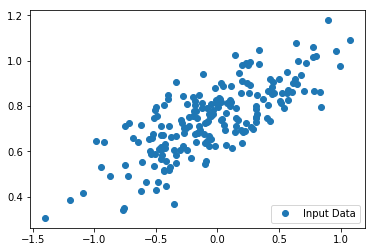

In [12]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

<hr>
``` python
# tf.random_uniform

Signature: tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
Docstring:
Outputs random values from a uniform distribution.

Returns:
  A tensor of the specified shape filled with random uniform values.
```


In [13]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()


A Jupyter Widget


 y = [-0.70308787] x + [ 0.70465827] 


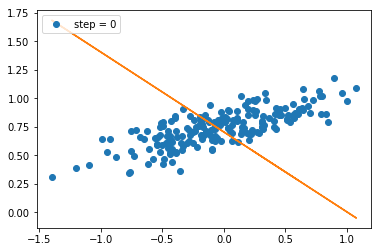


 y = [-0.5052439] x + [ 0.71356606] 


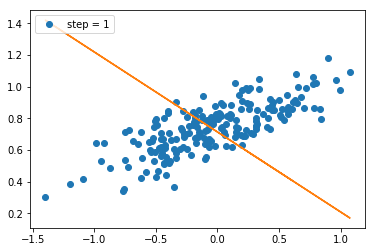


 y = [-0.34794357] x + [ 0.72187418] 


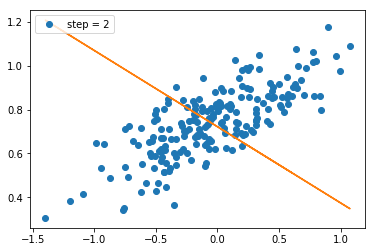


 y = [-0.2228269] x + [ 0.72847968] 


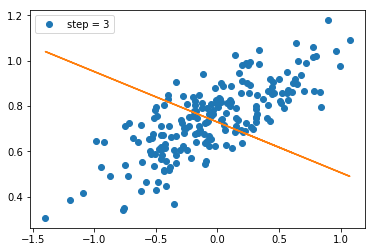


 y = [-0.12330921] x + [ 0.73373371] 


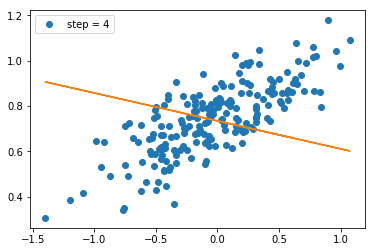


 y = [ 0.26357213] x + [ 0.75415909] 


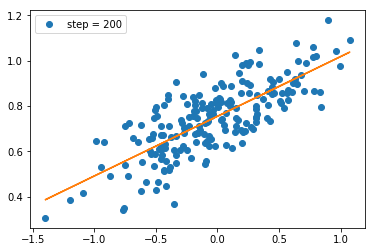


 y = [ 0.26357213] x + [ 0.75415909] 


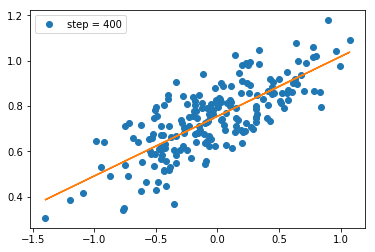


 y = [ 0.26357213] x + [ 0.75415909] 


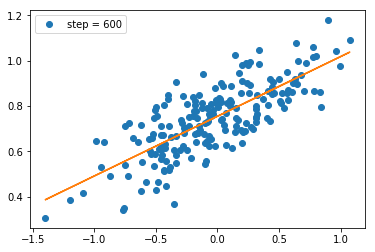


 y = [ 0.26357213] x + [ 0.75415909] 


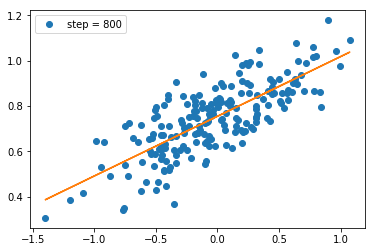


 y = [ 0.26357213] x + [ 0.75415909] 


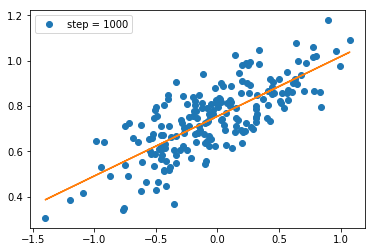


 y = [ 0.26357213] x + [ 0.75415909] 


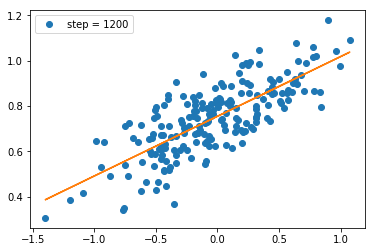


 y = [ 0.26357213] x + [ 0.75415909] 


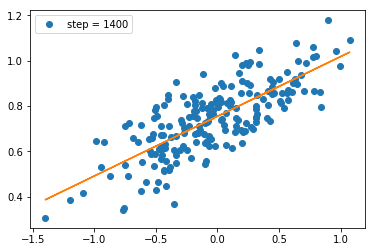


 y = [ 0.26357213] x + [ 0.75415909] 


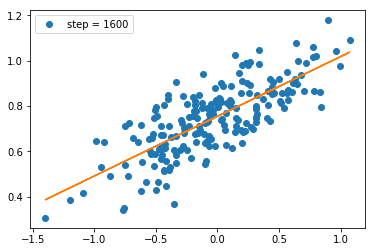


 y = [ 0.26357213] x + [ 0.75415909] 


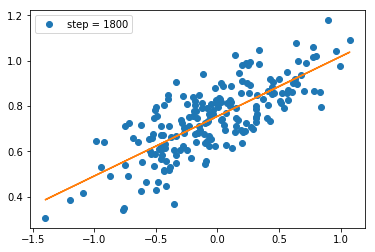


 y = [ 0.26357213] x + [ 0.75415909] 


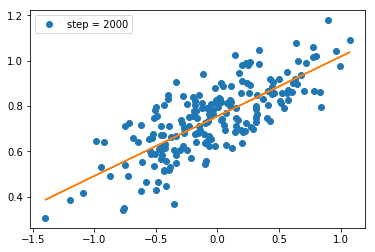

In [14]:
with tf.Session() as sess:
    sess.run(model)
    for step in tqdm_notebook(range(0,2001)):
        sess.run(train)
        if (step % 200) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>